In [5]:
library(tidyverse)
library(tidymodels)
library(repr)
library(ggplot2)
library(lubridate)
library(forcats)
library(tidyr)

In [40]:
players <- read_csv("data/players.csv")
sessions <- read_csv("data/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [41]:
players_cleaned <- players |> filter(!is.na(experience), !is.na(subscribe), !is.na(hashedEmail), !is.na(played_hours), !is.na(name), !is.na(gender), !is.na(Age))
sessions_cleaned <- sessions |> filter(!is.na(hashedEmail), !is.na(original_start_time), !is.na(original_end_time))

In [45]:
sessions_player <- sessions_cleaned |> group_by(hashedEmail) |> summarize(number_of_sessions = n(), .groups = "drop")
players_combined <- players_cleaned |> left_join (sessions_player, by = "hashedEmail") |> filter (!is.na(number_of_sessions))
players_combined$experience <- as.factor(players_combined$experience)
players_final <- players_combined |> select(played_hours, number_of_sessions, subscribe, experience) |> mutate(subscribe = as.factor(subscribe))
players_final

played_hours,number_of_sessions,subscribe,experience
<dbl>,<int>,<fct>,<fct>
30.3,27,TRUE,Pro
3.8,3,TRUE,Veteran
0.0,1,FALSE,Veteran
0.7,1,TRUE,Amateur
0.1,1,TRUE,Regular
0.0,1,FALSE,Amateur
0.1,1,TRUE,Amateur
1.6,3,TRUE,Veteran
1.5,1,TRUE,Beginner


In [68]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |> set_engine("kknn") |> set_mode("classification")
knn_fit <- knn_spec |> fit(subscribe ~ experience + played_hours + number_of_sessions, data = players_final)
player_recipe <- recipe(subscribe ~ experience + played_hours + number_of_sessions, data = players_final) |> step_scale(played_hours, number_of_sessions)|>
step_center(played_hours, number_of_sessions) |> prep()
scaled_player <- bake(player_recipe, players_final)
scaled_player

experience,played_hours,number_of_sessions,subscribe
<fct>,<dbl>,<dbl>,<fct>
Pro,0.5929465,0.34962267,TRUE
Veteran,-0.1557593,-0.22696175,TRUE
Veteran,-0.2631209,-0.27501045,FALSE
Amateur,-0.2433437,-0.27501045,TRUE
Regular,-0.2602956,-0.27501045,TRUE
Amateur,-0.2631209,-0.27501045,FALSE
Amateur,-0.2602956,-0.27501045,TRUE
Veteran,-0.2179160,-0.22696175,TRUE
Beginner,-0.2207413,-0.27501045,TRUE


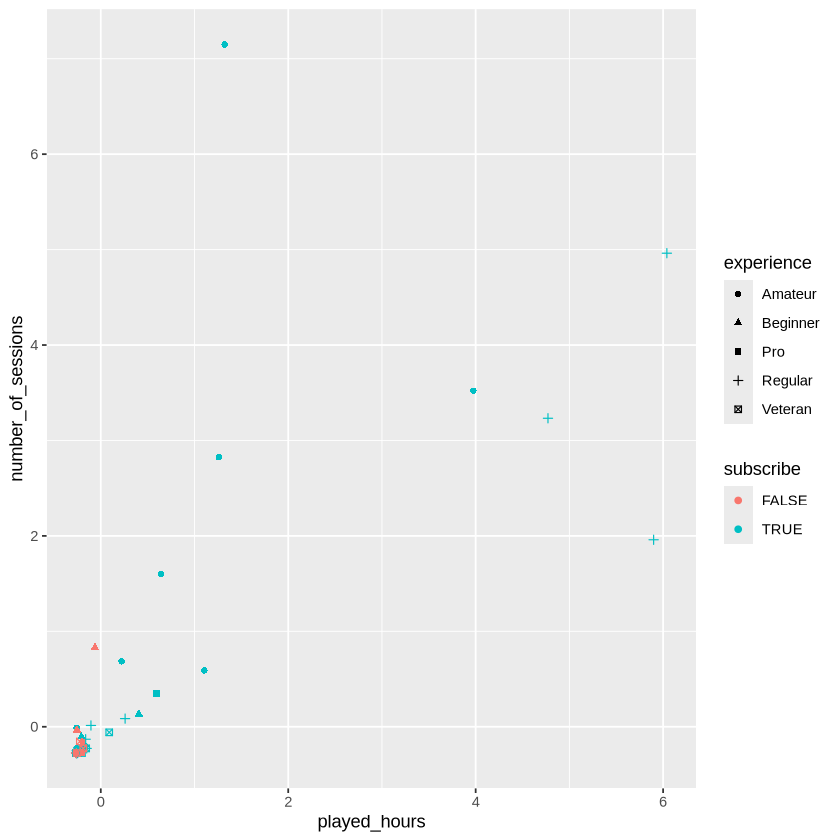

In [72]:
scaled_player_graph <- scaled_player |> ggplot(aes(x = played_hours, y = number_of_sessions, shape = experience, colour = subscribe)) + geom_point() 
scaled_player_graph